# Featuring Engineering

Para a Classificação vamos utilizar Regressão Logistica sendo LotArea,OverallCond e OverallQual como Predictors e SalePrice como outcome

In [1]:
import pandas as pd

In [19]:
df_limpo = pd.read_csv(r'..\train.csv')
df_limpo = df_limpo[['LotArea','OverallCond','OverallQual','SalePrice']]
media_preco_venda = df_limpo['SalePrice'].mean()
df_limpo['SalePrice'] = df_limpo['SalePrice'].apply(lambda x: 'Alto' if x >= media_preco_venda else'Baixo')
df_limpo

,LotArea,OverallCond,OverallQual,SalePrice
0,8450,5,7,Alto
1,9600,8,6,Alto
2,11250,5,7,Alto
3,9550,5,7,Baixo
4,14260,5,8,Alto
...,...,...,...,...
1455,7917,5,6,Baixo
1456,13175,6,6,Alto
1457,9042,9,7,Alto
1458,9717,6,5,Baixo


# Codigo

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

In [21]:
x = df_limpo[['LotArea','OverallCond','OverallQual']]
y = df_limpo[['SalePrice']]

In [22]:
modelo = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')

modelo.fit(x,y)

c:\Users\rhuan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1e+42, solver='liblinear')

In [27]:


print(f'Preço de venda da casa previsto: {modelo.predict(x)[0]}')

probabilidades = pd.DataFrame(modelo.predict_proba(x), columns= modelo.classes_)
print('Probabilidades previstas: ')
probabilidades

Preço de venda da casa previsto: Alto
Probabilidades previstas: 


,Alto,Baixo
0,0.669488,0.330512
1,0.196890,0.803110
2,0.770616,0.229384
3,0.711899,0.288101
4,0.978083,0.021917
...,...,...
1455,0.192615,0.807385
1456,0.360007,0.639993
1457,0.609145,0.390855
1458,0.037586,0.962414


In [28]:
print('intercept ', modelo.intercept_[0])
print('classes ', modelo.classes_)
pd.DataFrame({'coeff': modelo.coef_[0]}, index = x.columns)

intercept  14.658249105326174
classes  ['Alto' 'Baixo']


,coeff
LotArea,-0.000181
OverallCond,0.092279
OverallQual,-2.042672


# Metricas de Avaliação

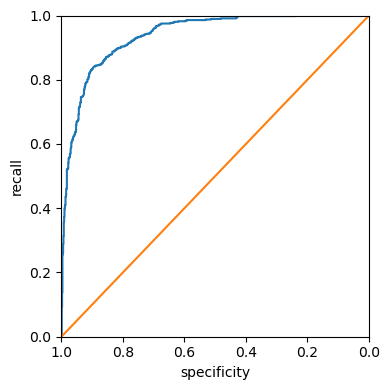

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, modelo.predict_proba(x)[:, 0],
pos_label='Alto')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
plt.tight_layout()
plt.show()



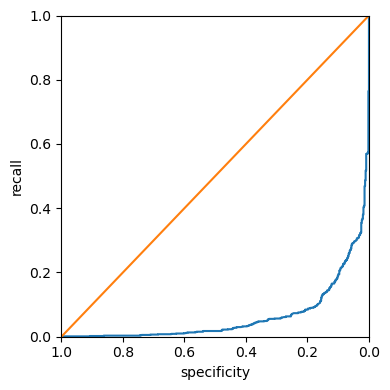

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, modelo.predict_proba(x)[:, 0],
pos_label='Baixo')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
plt.tight_layout()
plt.show()

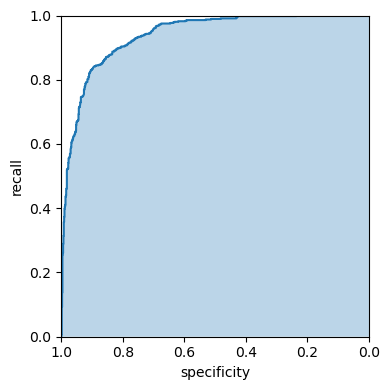

0.9381488095238095


In [40]:
fpr, tpr, thresholds = roc_curve(y, modelo.predict_proba(x)[:,0],
pos_label='Alto')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
# ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity,
0,
roc_df.recall, alpha=0.3)
plt.tight_layout()
plt.show()
print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))

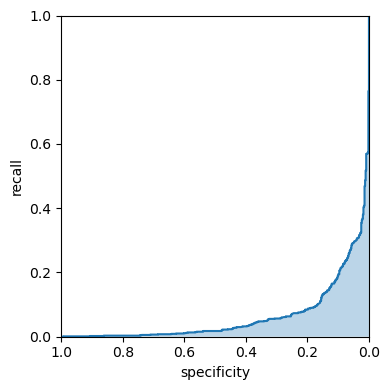

0.06178968253968253


In [41]:
fpr, tpr, thresholds = roc_curve(y, modelo.predict_proba(x)[:,0],
pos_label='Baixo')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
# ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity,
0,
roc_df.recall, alpha=0.3)
plt.tight_layout()
plt.show()
print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))